### CREDIT EDA CASE STUDY

### Importing Libraries and setting Global values

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)

#### Importing "Application Data file" and fetching top 5 records

In [2]:
df_app_data =pd.read_csv('application_data.csv')
df_app_data.head(5)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

#### Checking shape of the dataset:

In [3]:
df_app_data.shape

(307511, 122)

#### Checking dataset columns info: ####

In [4]:
#df_app_data.info()
df_app_data.dtypes

SK_ID_CURR                        int64
TARGET                            int64
NAME_CONTRACT_TYPE               object
CODE_GENDER                      object
FLAG_OWN_CAR                     object
FLAG_OWN_REALTY                  object
CNT_CHILDREN                      int64
AMT_INCOME_TOTAL                float64
AMT_CREDIT                      float64
AMT_ANNUITY                     float64
AMT_GOODS_PRICE                 float64
NAME_TYPE_SUITE                  object
NAME_INCOME_TYPE                 object
NAME_EDUCATION_TYPE              object
NAME_FAMILY_STATUS               object
NAME_HOUSING_TYPE                object
REGION_POPULATION_RELATIVE      float64
DAYS_BIRTH                        int64
DAYS_EMPLOYED                     int64
DAYS_REGISTRATION               float64
DAYS_ID_PUBLISH                   int64
OWN_CAR_AGE                     float64
FLAG_MOBIL                        int64
FLAG_EMP_PHONE                    int64
FLAG_WORK_PHONE                   int64


#### Describing the data to see statistics for numerical columns:

In [5]:
df_app_data.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,104582.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307509.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,134133.000000,3.068510e+05,246546.000000,151450.00000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,159080.000000,306490.000000,306490.000000,306490.000000,306490.000000,307510.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.00000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,-4986.120328,-2994.202373,12.061091,0.999997,0.819889,0.199368,0.998133,0.281066,0.056720,2.152665,2.052463,2.031521,12.063419,0.015144,0.050769,0.040659,0.078173,0.230454,0.179555,0.502130,5.143927e-01,0.510853,0.11744,0.088442,0.977735,0.752471,0.044621,0.078942,0.149725,0.226282,0.231894,0.066333,0.100775,0.107399,0.008809,0.028358,0.114231,0.087543,0.977065,0.759637,0.042553,0.074490,0.145193,0.222315,0.228058,0.064958,0.105645,0.105975,0.008076,0.027022,0.117850,0.087955,0.97

### Data Cleaning and Manipulation

#### Fetching top 20 Null Value Percentages for inspection:

In [6]:
# creating common function to calculate null percentage for dataset
def null_value_per(df):
    return(round((df.isnull().sum()/len(df.index))*100,2).sort_values(ascending=False))
    
null_value_per(df_app_data).head(20)

COMMONAREA_MEDI             69.87
COMMONAREA_AVG              69.87
COMMONAREA_MODE             69.87
NONLIVINGAPARTMENTS_MODE    69.43
NONLIVINGAPARTMENTS_MEDI    69.43
NONLIVINGAPARTMENTS_AVG     69.43
FONDKAPREMONT_MODE          68.39
LIVINGAPARTMENTS_MEDI       68.35
LIVINGAPARTMENTS_MODE       68.35
LIVINGAPARTMENTS_AVG        68.35
FLOORSMIN_MEDI              67.85
FLOORSMIN_MODE              67.85
FLOORSMIN_AVG               67.85
YEARS_BUILD_MEDI            66.50
YEARS_BUILD_AVG             66.50
YEARS_BUILD_MODE            66.50
OWN_CAR_AGE                 65.99
LANDAREA_MODE               59.38
LANDAREA_AVG                59.38
LANDAREA_MEDI               59.38
dtype: float64

#### Delete Missing Values:

In [7]:
# Drop the columns with high percentage(> 45%) of missing values as per the above result
Missing_cols =df_app_data.columns[round((df_app_data.isnull().sum()/len(df_app_data.index))*100,2)>  45]
df_app_data.drop(columns=Missing_cols,inplace=True)
null_value_per(df_app_data).head(20)

OCCUPATION_TYPE               31.35
EXT_SOURCE_3                  19.83
AMT_REQ_CREDIT_BUREAU_YEAR    13.50
AMT_REQ_CREDIT_BUREAU_MON     13.50
AMT_REQ_CREDIT_BUREAU_WEEK    13.50
AMT_REQ_CREDIT_BUREAU_DAY     13.50
AMT_REQ_CREDIT_BUREAU_HOUR    13.50
AMT_REQ_CREDIT_BUREAU_QRT     13.50
NAME_TYPE_SUITE                0.42
DEF_60_CNT_SOCIAL_CIRCLE       0.33
OBS_60_CNT_SOCIAL_CIRCLE       0.33
DEF_30_CNT_SOCIAL_CIRCLE       0.33
OBS_30_CNT_SOCIAL_CIRCLE       0.33
EXT_SOURCE_2                   0.21
AMT_GOODS_PRICE                0.09
FLAG_MOBIL                     0.00
FLAG_WORK_PHONE                0.00
FLAG_EMP_PHONE                 0.00
DAYS_REGISTRATION              0.00
FLAG_CONT_MOBILE               0.00
dtype: float64

In [8]:
# checking dataframe shape again after dropping columns.
df_app_data.shape

(307511, 73)

In [9]:
# Dropping rows which have high null percentage( > 13% ) for below columns
df_app_data=df_app_data.dropna(subset=['OCCUPATION_TYPE', 'AMT_REQ_CREDIT_BUREAU_YEAR','EXT_SOURCE_3',
                                       'AMT_REQ_CREDIT_BUREAU_MON','AMT_REQ_CREDIT_BUREAU_WEEK','AMT_REQ_CREDIT_BUREAU_DAY',
                                       'AMT_REQ_CREDIT_BUREAU_HOUR','AMT_REQ_CREDIT_BUREAU_QRT'])
null_value_per(df_app_data).head(10)

NAME_TYPE_SUITE             0.44
DEF_60_CNT_SOCIAL_CIRCLE    0.30
OBS_60_CNT_SOCIAL_CIRCLE    0.30
OBS_30_CNT_SOCIAL_CIRCLE    0.30
DEF_30_CNT_SOCIAL_CIRCLE    0.30
EXT_SOURCE_2                0.15
AMT_GOODS_PRICE             0.10
AMT_ANNUITY                 0.01
FLAG_EMP_PHONE              0.00
FLAG_WORK_PHONE             0.00
dtype: float64

In [10]:
# checking dataframe shape again after dropping rows.
df_app_data.shape

(169263, 73)

##### we can now see how to impute missing values into the columns with less null value percentage:

In [11]:
# check distinct values for NAME_TYPE_SUITE column along with value percentage
df_app_data.NAME_TYPE_SUITE.value_counts(normalize=True)

Unaccompanied      0.818623
Family             0.125707
Spouse, partner    0.037588
Children           0.008985
Other_B            0.005531
Other_A            0.002706
Group of people    0.000860
Name: NAME_TYPE_SUITE, dtype: float64

#### As we can see from above that most common value is 'Unaccompanied' hence null values can be imputed with same value.

### Verifying outliers for columns with numerical values and see how to handle those :

In [12]:
# computing quartile values for few selected numerical columns to check for outliers.
df_app_data[['DEF_60_CNT_SOCIAL_CIRCLE','OBS_60_CNT_SOCIAL_CIRCLE','OBS_30_CNT_SOCIAL_CIRCLE','DEF_30_CNT_SOCIAL_CIRCLE',
           'EXT_SOURCE_2','AMT_GOODS_PRICE','AMT_ANNUITY']].describe(percentiles=[0,0.25,0.50,0.75,0.95,0.97,0.99])

,DEF_60_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,EXT_SOURCE_2,AMT_GOODS_PRICE,AMT_ANNUITY
count,168750.000000,168750.000000,168750.000000,168750.000000,169007.000000,1.690960e+05,169252.000000
mean,0.098193,1.415283,1.432225,0.141215,0.520031,5.572308e+05,27872.686958
std,0.361192,2.423886,2.446074,0.446080,0.187792,3.748391e+05,14473.640700
min,0.000000,0.000000,0.000000,0.000000,0.000005,4.050000e+04,1980.000000
0%,0.000000,0.000000,0.000000,0.000000,0.000005,4.050000e+04,1980.000000
25%,0.000000,0.000000,0.000000,0.000000,0.406244,2.475000e+05,17167.500000
50%,0.000000,0.000000,0.000000,0.000000,0.571020,4.545000e+05,25978.500000
75%,0.000000,2.000000,2.000000,0.000000,0.664831,7.020000e+05,35685.000000
95%,1.000000,6.000000,6.000000,1.000000,0.747567,1.345500e+06,53500.500000
97%,1.000000,7.000000,7.000000,1.000000,0.761395,1.363500e+06,59023.575000


#### As it is clearly visible from above that a huge gap exists between 99 percetile value and maximum value for below columns
#### which represents an outlier hence we can't impute null with mean value. we can impute with median value instead:
1. DEF_60_CNT_SOCIAL_CIRCLE
2. OBS_60_CNT_SOCIAL_CIRCLE
3. OBS_30_CNT_SOCIAL_CIRCLE
4. DEF_30_CNT_SOCIAL_CIRCLE

#### Also due to Continuous nature of below 3 columns and low null percentage we can drop rows having null values for these
#### columns instead of imputing:
1. AMT_GOODS_PRICE
2. AMT_ANNUITY
3. EXT_SOURCE2

#### Creating boxplots also for numerical value columns for visual representation of Outliers:

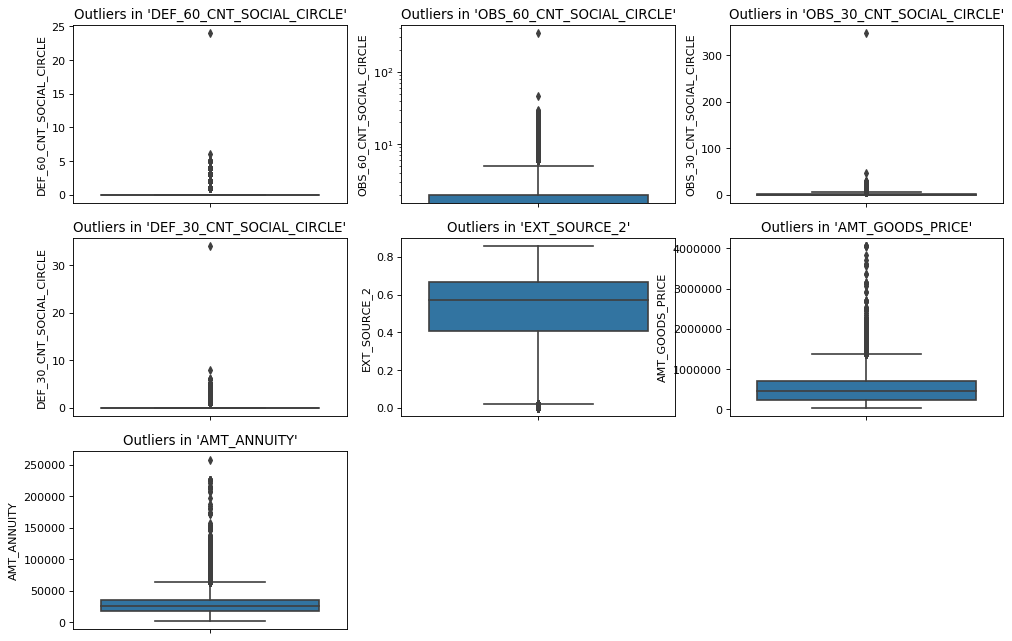

In [13]:
# plotting boxplots for integer columns for visual verification of outliers.
plt.figure(figsize=(15,10), dpi=80)
plt.subplot(3,3,1)
sns.boxplot(y=df_app_data['DEF_60_CNT_SOCIAL_CIRCLE'])
plt.title("Outliers in 'DEF_60_CNT_SOCIAL_CIRCLE'")

plt.subplot(3,3,2)
ax = sns.boxplot(y=df_app_data['OBS_60_CNT_SOCIAL_CIRCLE'])
ax.set_yscale('log')
plt.title("Outliers in 'OBS_60_CNT_SOCIAL_CIRCLE'")

plt.subplot(3,3,3)
sns.boxplot(y=df_app_data['OBS_30_CNT_SOCIAL_CIRCLE'])
plt.title("Outliers in 'OBS_30_CNT_SOCIAL_CIRCLE'")

plt.subplot(3,3,4)
sns.boxplot(y=df_app_data['DEF_30_CNT_SOCIAL_CIRCLE'])
plt.title("Outliers in 'DEF_30_CNT_SOCIAL_CIRCLE'")

plt.subplot(3,3,5)
sns.boxplot(y=df_app_data['EXT_SOURCE_2'])
plt.title("Outliers in 'EXT_SOURCE_2'")

plt.subplot(3,3,6)
sns.boxplot(y=df_app_data['AMT_GOODS_PRICE'])
plt.title("Outliers in 'AMT_GOODS_PRICE'")

plt.subplot(3,3,7)
sns.boxplot(y=df_app_data['AMT_ANNUITY'])
plt.title("Outliers in 'AMT_ANNUITY'")

plt.show()

In [14]:
# checking percentile values for each column in dataset to get a gist of spread of values.
df_app_data.describe(percentiles=[0.05,0.25,0.50,0.75,0.95,0.97,0.99])


,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,169263.000000,169263.000000,169263.000000,1.692630e+05,1.692630e+05,169252.000000,1.690960e+05,169263.000000,169263.000000,169263.000000,169263.000000,169263.000000,169263.0,169263.000000,169263.000000,169263.000000,169263.000000,169263.00000,169262.000000,169263.000000,169263.000000,169263.000000,169263.000000,169263.000000,169263.000000,169263.000000,169263.000000,169263.000000,169007.000000,169263.000000,168750.000000,168750.000000,168750.000000,168750.000000,169263.000000,169263.0,169263.000000,169263.000000,169263.000000,169263.000000,169263.000000,169263.000000,169263.000000,169263.000000,169263.000000,169263.000000,169263.000000,169263.000000,169263.000000,169263.000000,169263.000000,169263.000000,169263.000000,169263.000000,169263.000000,169263.000000,169263.000000,169263.000000,169263.000000,169263.000000,169263.000000
mean,278216.517863,0.084443,0.512469,1.792007e+05,6.201626e+05,27872.686958,5.572308e+05,0.020638,-14876.566149,-2468.850139,-4636.653539,-2871.352534,1.0,0.999953,0.242280,0.997731,0.283435,0.06429,2.277387,2.050413,2.029953,12.227841,0.015597,0.058477,0.047276,0.085813,0.274271,0.215399,0.520031,0.500858,1.432225,0.141215,1.415283,0.098193,-1006.080236,0.0,0.765672,0.000065,0.015999,0.008661,0.000183,0.098876,0.004053,0.000035,0.004153,0.000012,0.004685,0.003403,0.001524,0.012631,0.000372,0.010457,0.000750,0.000768,0.000354,0.006469,0.006794,0.033994,0.288616,0.257410,1.853423
std,102903.421216,0.278051,0.769225,3.032315e+05,4.084972e+05,14473.640700,3.748391e+05,0.013521,3595.823273,2553.046039,3248.420132,1500.919640,0.0,0.006875,0.428464,0.047577,0.450667,0.24527,0.941634,0.502460,0.497492,3.272390,0.123911,0.234644,0.212228,0.280089,0.446148,0.411100,0.187792,0.195880,2.446074,0.446080,2.423886,0.361192,834.944473,0.0,0.423579,0.008061,0.125471,0.092661,0.013532,0.298496,0.063533,0.005954,0.064312,0.003437,0.068287,0.058236,0.039012,0.111677,0.019289,0.101724,0.027382,0.027703,0.018824,0.084547,0.110325,0.202465,0.962012,0.601595,1.813965
min,100002.000000,0.000000,0.000000,2.655000e+04,4.500000e+04,1980.000000,4.050000e+04,0.000290,-25200.000000,-17912.000000,-22928.000000,-7197.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.00000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000005,0.000527,0.000000,0.000000,0.000000,0.000000,-4185.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5%,117870.200000,0.000000,0.000000,7.650000e+04,1.483650e+05,9000.000000,1.350000e+05,0.005002,-20913.000000,-7511.000000,-10369.900000,-4933.000000,1.0,1.000000,0.000000,1.000000,0.000000,0.00000,1.000000,1.000000,1.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0

In [15]:
# checking dataframe details 
df_app_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 169263 entries, 0 to 307510
Data columns (total 73 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   169263 non-null  int64  
 1   TARGET                       169263 non-null  int64  
 2   NAME_CONTRACT_TYPE           169263 non-null  object 
 3   CODE_GENDER                  169263 non-null  object 
 4   FLAG_OWN_CAR                 169263 non-null  object 
 5   FLAG_OWN_REALTY              169263 non-null  object 
 6   CNT_CHILDREN                 169263 non-null  int64  
 7   AMT_INCOME_TOTAL             169263 non-null  float64
 8   AMT_CREDIT                   169263 non-null  float64
 9   AMT_ANNUITY                  169252 non-null  float64
 10  AMT_GOODS_PRICE              169096 non-null  float64
 11  NAME_TYPE_SUITE              168511 non-null  object 
 12  NAME_INCOME_TYPE             169263 non-null  object 
 13 

## Create derived column for Analysis

#### We have performed binning on below columns for analysis:
1. AMT_INCOME_TOTAL
2. CNT_FAM_MEMBERS
3. AGE
4. AMT_CREDIT
5. AMT_ANNUITY

#### We have manipulated below columns for analysis:
1. DAYS_BIRTH
2. DAYS_EMPLOYED
3. ORGANIZATION_TYPE

In [16]:
# describing AMT_INCOME_TOTAL column values to check percentile values.
df_app_data['AMT_INCOME_TOTAL'].describe().apply(lambda x: format(x, 'f'))

count       169263.000000
mean        179200.684216
std         303231.467186
min          26550.000000
25%         112500.000000
50%         157500.000000
75%         225000.000000
max      117000000.000000
Name: AMT_INCOME_TOTAL, dtype: object

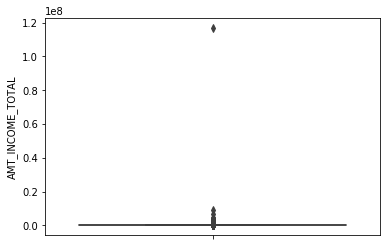

In [17]:
# plotting boxplot for AMT_INCOME_TOTAL column to see outlier value.
sns.boxplot(y=df_app_data['AMT_INCOME_TOTAL']);

#### AMT_INCOME_TOTAL column has an outlier 117000000.000000 which can be seen above. To resolve this, we are performing binning as below for analysis.

In [18]:
q25= df_app_data['AMT_INCOME_TOTAL'].quantile(0.25)
q50= df_app_data['AMT_INCOME_TOTAL'].quantile(0.50)
q75= df_app_data['AMT_INCOME_TOTAL'].quantile(0.75)

In [19]:
# creating function to perform binning of 'AMT_INCOME_TOTAL' variable into 'Lower Class',
#'Lower Middle Class','Upper Middle Class','Upper Class' and storing into a new column 'INCOME_CATEGORY'
def income_cat(df):
    if df['AMT_INCOME_TOTAL'] <=q25:
        return 'Lower Class'
    if df['AMT_INCOME_TOTAL'] >q25 and df['AMT_INCOME_TOTAL'] <=q50:
        return 'Lower Middle Class'
    if df['AMT_INCOME_TOTAL'] >q50 and df['AMT_INCOME_TOTAL'] <=q75:
        return 'Upper Middle Class'
    if df['AMT_INCOME_TOTAL'] >q75:
        return 'Upper Class'
    else:
        return np.nan
    
df_app_data['INCOME_CATEGORY']= df_app_data.apply(income_cat, axis = 1)

In [20]:
# checking distinct value count for 'INCOME_CATEGORY' column
df_app_data['INCOME_CATEGORY'].value_counts()

Upper Middle Class    46585
Lower Class           46518
Lower Middle Class    45981
Upper Class           30179
Name: INCOME_CATEGORY, dtype: int64

In [21]:
# checking count of value and percentages for 'CNT_FAM_MEMBERS' column.
df_app_data0=df_app_data['CNT_FAM_MEMBERS'].value_counts(normalize=True).reset_index().sort_values(by='index')
df_app_data0.columns=['FAM_MEMBERS_VALUE','FAM_MEMBERS_VALUE_PERCENTAGE']
df_app_data0

,FAM_MEMBERS_VALUE,FAM_MEMBERS_VALUE_PERCENTAGE
2,1.0,0.183426
0,2.0,0.491126
1,3.0,0.208665
3,4.0,0.101086
4,5.0,0.013801
5,6.0,0.001430
6,7.0,0.000313
7,8.0,0.000059
8,9.0,0.000030
9,10.0,0.000018


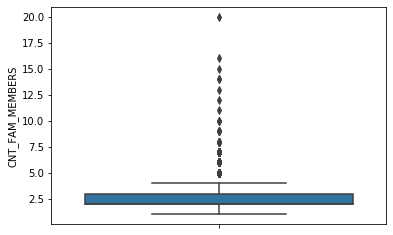

In [22]:
# plotting boxplot for CNT_FAM_MEMBERS to see outlier value
sns.boxplot(y=df_app_data['CNT_FAM_MEMBERS']);

#### CNT_FAM_MEMBERS column has an outlier 20 which can be seen above. To resolve this, we are performing binning as below for analysis.

In [23]:
#binning values for 'CNT_FAM_MEMBERS' column and storing into a new column 'FAM_SIZE'
df_app_data['FAM_SIZE'] =pd.cut(df_app_data.CNT_FAM_MEMBERS,[0,3,5,7,10,9999],labels=['<3','3-5','5-7','7-10','10+'])

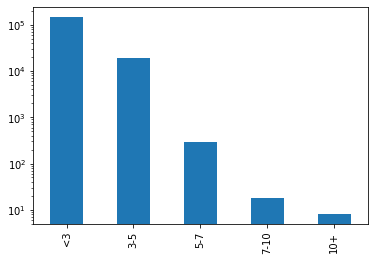

In [24]:
# plotting bar chart for 'FAM_SIZE' categorical variable.
df_app_data['FAM_SIZE'].value_counts().plot.bar(logy=True);

In [25]:
#Converting Days of Birth to Age by taking absolute to remove negative value and dividing by 365
df_app_data['AGE']=round(abs(df_app_data['DAYS_BIRTH']/365)).astype(int)

In [26]:
# Converting Days of Birth to integer and converting into positive values
df_app_data['DAYS_BIRTH']=round(abs(df_app_data['DAYS_BIRTH'])).astype(int)

In [27]:
#binning values for AGE

def age_grp(df):
    if (df['AGE'] <= 12):
        return 'Kid'
    elif (df['AGE'] > 12 and df['AGE'] <= 19):
        return 'Teenager'
    elif (df['AGE'] > 19 and df['AGE'] <= 25):
        return 'Youth'
    elif (df['AGE'] > 25 and df['AGE'] <= 59):
        return 'Adult'
    elif (df['AGE'] > 59):
        return 'Senior Citizens'
    else:
        return np.nan
    

df_app_data['AGE_GROUP']= df_app_data.apply(age_grp, axis = 1)

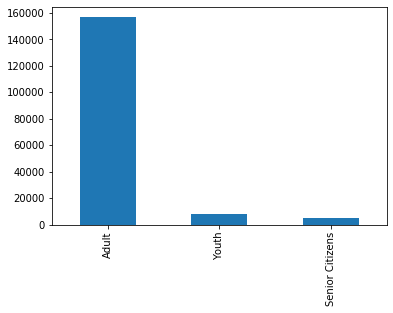

In [28]:
# plotting bar chart for 'AGE_GROUP' categorical variable.
df_app_data['AGE_GROUP'].value_counts().plot.bar();

In [29]:
# binning values for AMT_CREDIT into 4 categories as 'Low','Medium','High' and 'Very_High' for further analysis
def amt_credit(x):
    if x <=500000:
        return 'Low'
    if 500000<x<=1000000:
        return 'Medium'
    if 1000000<x<=1500000:
        return 'High'
    if x>1500000:
        return 'Very_High'
    else:
        return np.nan
# using above function for binning and saving into a new column
df_app_data['LOAN_CATEGORY']=df_app_data['AMT_CREDIT'].apply(amt_credit)

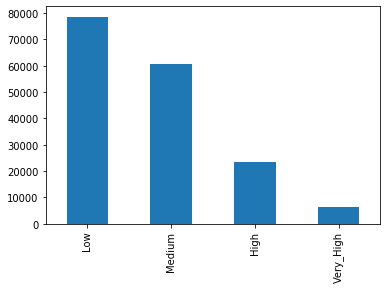

In [30]:
# plotting bar chart for 'INCOME_GROUP' categorical variable.
df_app_data['LOAN_CATEGORY'].value_counts().plot.bar();

In [31]:
# binning values for AMT_ANNUITY into 4 categories as 'Low','Medium','High' and 'Very_High' for further analysis
def amt_annuity(x):    
    if x <=10000:
        return 'Low'
    if 10000<x<=20000:
        return 'Medium'
    if 20000<x<=30000:
        return 'High'
    if x>30000:
        return 'Very_High'
    else:
        return np.nan
# using above function for binning and saving into a new column
df_app_data['ANNUITY_CATEGORY']=df_app_data['AMT_ANNUITY'].apply(amt_annuity)

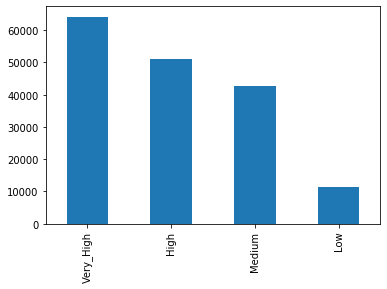

In [32]:
# plotting bar chart for 'ANNUITY_GROUP' categorical variable.
df_app_data['ANNUITY_CATEGORY'].value_counts().plot.bar();

In [33]:
# Coverting Days employed to Years by taking absolute to remove negative value and dividing by 365
df_app_data['YEARS_EMPLOYED']=round(abs(df_app_data['DAYS_EMPLOYED']/365)).astype(int)

In [34]:
# Coverting Days Employed to integer and converting into positive values
df_app_data['DAYS_EMPLOYED']=round(abs(df_app_data['DAYS_EMPLOYED'])).astype(int)

In [35]:
# Categorising ORGANIZATION_TYPE into ORGANIZATION_CAT
df_app_data['ORGANIZATION_CAT'] = df_app_data['ORGANIZATION_TYPE'].str.split(' |:').str[0]

In [36]:
# describing AMT_GOODS_PRICE column for percentile values.
df_app_data['AMT_GOODS_PRICE'].describe().apply(lambda x: format(x, 'f'))

count     169096.000000
mean      557230.813437
std       374839.054944
min        40500.000000
25%       247500.000000
50%       454500.000000
75%       702000.000000
max      4050000.000000
Name: AMT_GOODS_PRICE, dtype: object

### Check for Data Imbalance

In [37]:
# checking value count and percentage for 'TARGET' column.
round(df_app_data['TARGET'].value_counts(normalize=True)*100,2)

0    91.56
1     8.44
Name: TARGET, dtype: float64

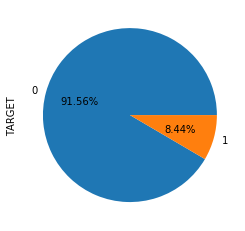

In [38]:
#Data imbalance Ratio between the Defaulter and non-defaulters through pie chart.
df_app_data['TARGET'].value_counts(normalize=True).plot.pie(autopct='%1.2f%%');

#### Insight: Out of total loan applications about 8.44 % defaulted

In [39]:
# checking all the columns of dataframe and select few of them for analysis
df_app_data.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL',
       'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE',
       'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS',
       'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY',
       'ORGANIZATION_TYPE', 'EXT_SOURCE_2', 'EXT_SOURCE_3',
       'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_C

In [40]:
# Dividing dataframe into 2 datasets as per 'TARGET' column values
df_app_data_0=df_app_data.loc[df_app_data['TARGET']==0]
df_app_data_1=df_app_data.loc[df_app_data['TARGET']==1]

In [41]:
# fetching top 5 records from dataset with TARGET value as 0 
df_app_data_0.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,INCOME_CATEGORY,FAM_SIZE,AGE,AGE_GROUP,LOAN_CATEGORY,ANNUITY_CATEGORY,YEARS_EMPLOYED,ORGANIZATION_CAT
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,19046,225,-4260.0,-2531,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.555912,0.729567,0.0,0.0,0.0,0.0,-815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,Lower Class,<3,52,Adult,Low,Low,1,Government
5,100008,0,Cash loans,M,N,Y,0,99000.0,490495.5,27517.5,454500.0,"Spouse, partner",State servant,Secondary / secondary special,Married,House / apartment,0.035792,16941,1588,-4970.0,-477,1,1,1,1,1,0,Laborers,2.0,2,2,WEDNESDAY,16,0,0,0,0,0,0,Other,0.354225,0.621226,0.0,0.0,0.0,0.0,-2536.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,1.0,1.0,Lower Class,<3,46,Adult,Low,High,4,Other
6,100009,0,Cash loans,F,Y,Y,1,171000.0,1560726.0,41301.0,1395000.0,Unaccompanied,Commercial associate,Higher education,Married,House / apartment,0.035792,13778,3130,-1213.0,-619,1,1,0,1,1,0,Accountants,3.0,2,2,SUNDAY,16,0,0,0,0,0,0,Business Entity Type 3,0.724000,0.492060,1.0,0.0,1.0,0.0,-1562.0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0.0,0.0,0.0,1.0,1.0,2.0,Upper Middle Class,<3,38,Adult,Very_High,Very_High,9,Business
7,100010,0,Cash loans,M,Y,Y,0,360000.0,1530000.0,42075.0,1530000.0,Unaccompanied,State servant,Higher education,Married,House / apartment,0.003122,18850,449,-4597.0,-2379,1,1,1,1,0,0,Managers,2.0,3,3,MONDAY,16,0,0,0,0,1,1,Other,0.714279,0.540654,2.0,0.0,2.0,0.0,-1070.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,Upper Class,<3,52,Adult,Very_High,Very_High,1,Other
10,100014,0,Cash loans,F,N,Y,1,112500.0,652500.0,21177.0,652500.0,Unaccompanied,Working,Higher education,Married,House / apartment,0.022800,10197,679,-4427.0,-738,1,1,0,1,0,0,Core staff,3.0,2,2,SATURDAY,15,0,0,0,0,0,0,Medicine,0.651862,0.363945,0.0,0.0,0.0,0.0,-844.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,1.0,0.0,0.0,Lower Class,<3,28,Adult,Medium,High,2,Medicine


In [42]:
# fetching top 5 records from dataset with TARGET value as 1 
df_app_data_1.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,INCOME_CATEGORY,FAM_SIZE,AGE,AGE_GROUP,LOAN_CATEGORY,ANNUITY_CATEGORY,YEARS_EMPLOYED,ORGANIZATION_CAT
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,9461,637,-3648.0,-2120,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,0.139376,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,Upper Middle Class,<3,26,Adult,Low,High,2,Business
26,100031,1,Cash loans,F,N,Y,0,112500.0,979992.0,27076.5,702000.0,Unaccompanied,Working,Secondary / secondary special,Widow,House / apartment,0.018029,18724,2628,-6573.0,-1827,1,1,0,1,0,0,Cooking staff,1.0,3,2,MONDAY,9,0,0,0,0,0,0,Business Entity Type 3,0.548477,0.190706,10.0,1.0,10.0,0.0,-161.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0.0,0.0,0.0,0.0,2.0,2.0,Lower Class,<3,51,Adult,Medium,High,7,Business
40,100047,1,Cash loans,M,N,Y,0,202500.0,1193580.0,35028.0,855000.0,Unaccompanied,Commercial associate,Secondary / secondary special,Married,House / apartment,0.025164,17482,1262,-1182.0,-1029,1,1,0,1,0,0,Laborers,2.0,2,2,TUESDAY,9,0,0,0,0,0,0,Business Entity Type 3,0.306841,0.320163,0.0,0.0,0.0,0.0,-1075.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,2.0,0.0,4.0,Upper Middle Class,<3,48,Adult,High,Very_High,3,Business
42,100049,1,Cash loans,F,N,N,0,135000.0,288873.0,16258.5,238500.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.007305,13384,3597,-45.0,-4409,1,1,1,1,1,0,Sales staff,2.0,3,3,THURSDAY,11,0,0,0,0,0,0,Self-employed,0.674203,0.399676,1.0,0.0,1.0,0.0,-1480.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,2.0,Lower Middle Class,<3,37,Adult,Low,Medium,10,Self-employed
110,100130,1,Cash loans,F,N,Y,1,157500.0,723996.0,30802.5,585000.0,Unaccompanied,Commercial associate,Incomplete higher,Separated,House / apartment,0.007274,10526,267,-387.0,-3190,1,1,0,1,1,0,Sales staff,2.0,2,2,SUNDAY,12,0,1,1,0,1,1,Trade: type 2,0.282069,0.120641,0.0,0.0,0.0,0.0,-56.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,Lower Middle Class,<3,29,Adult,Medium,Very_High,1,Trade


### Univariate Analysis on Categorical variables for application data: 

In [43]:
# creating common function to plot categorical variables Vs Target column values.
def func_plot(col,title):
    sns.set(style="white")
    plt.figure(figsize=(10,5))
    plt.subplot(1,2,1)
    sns.countplot(x=df_app_data_0[col],hue='TARGET',data=df_app_data_0,palette="rocket")
    plt.title('TARGET 0:'+title)
    plt.xticks(rotation=90)
    plt.subplot(1,2,2)
    sns.countplot(x=df_app_data_1[col],hue='TARGET',data=df_app_data_1)
    plt.title('TARGET 1:'+title)
    plt.xticks(rotation=90)
    plt.tight_layout()

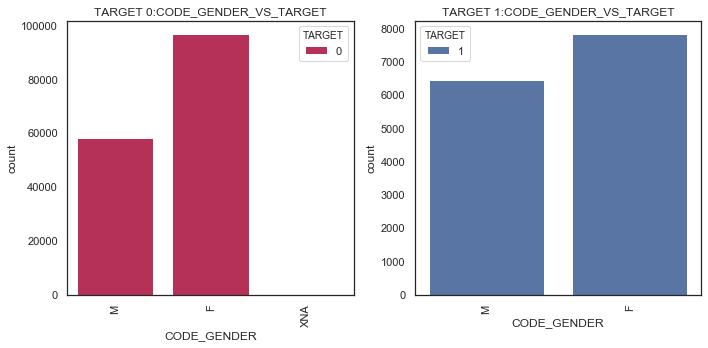

In [44]:
# Plotting Gender Vs Target:
func_plot('CODE_GENDER','CODE_GENDER_VS_TARGET')

#### Insight: Female applicants constitute larger population than males in loan application in both the cases Target=0 as well as Target=1

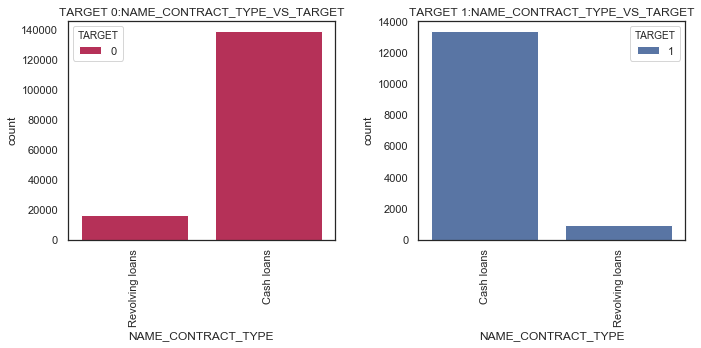

In [45]:
# Plotting Loan Type Vs Target:
func_plot('NAME_CONTRACT_TYPE','NAME_CONTRACT_TYPE_VS_TARGET')

#### Insight: Cash loans is most preferred form of loan application in both the cases Target=0 as well as Target=1

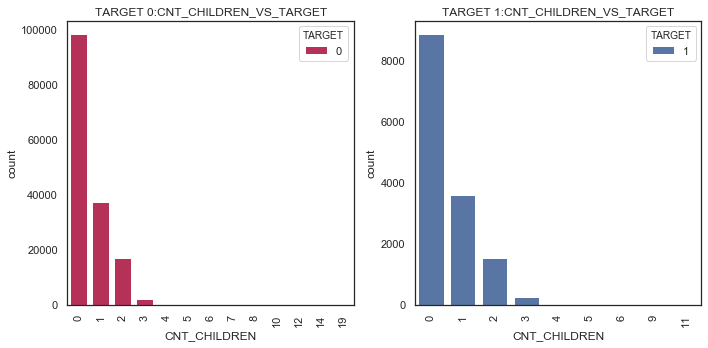

In [46]:
# Plotting Count of Children Vs Target:
func_plot('CNT_CHILDREN','CNT_CHILDREN_VS_TARGET')

#### Insight: People having 0 children constitute largest population in loan applications in both the cases Target=0 as well as Target=1

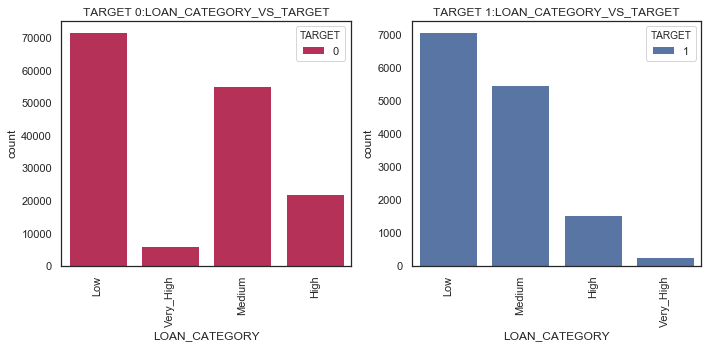

In [47]:
# Plotting Loan Amount Vs Target
func_plot('LOAN_CATEGORY','LOAN_CATEGORY_VS_TARGET')

#### Insight: Loan Amount( i.e. < 500000 ) constitute maximum share in application.

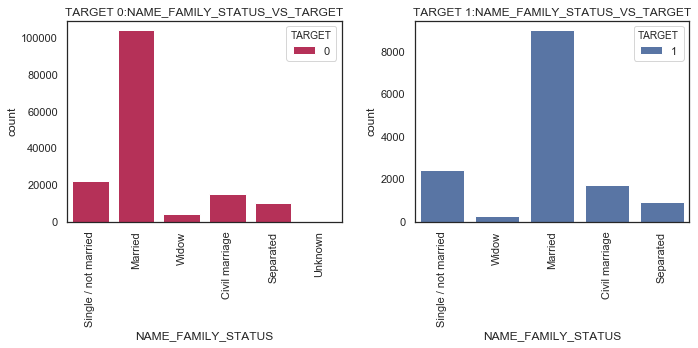

In [48]:
# Plotting Marital status Vs Target:
func_plot('NAME_FAMILY_STATUS','NAME_FAMILY_STATUS_VS_TARGET')

#### Insight: Married people constitute largest population in loan application in both the cases Target=0 as well as Target=1. This may arise due to additional financial overhead due to expenses and liabilities.

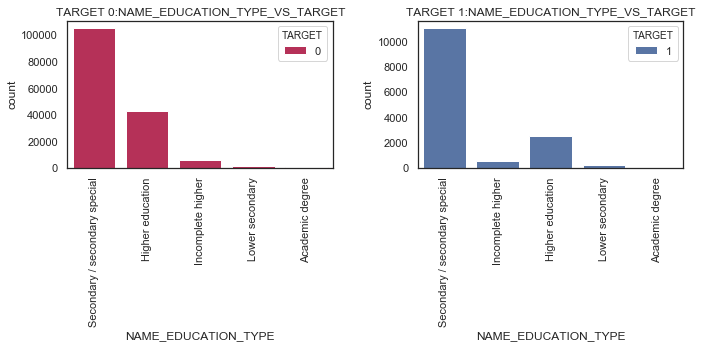

In [49]:
# Plotting Education level Vs Target:
func_plot('NAME_EDUCATION_TYPE','NAME_EDUCATION_TYPE_VS_TARGET')

#### Insight: People with Secondary / secondary special education constitute largest population in loan application.

## CORRELATION :

##### Top 10 correlations for Target 0:

In [50]:
df1=df_app_data_0.drop(['YEARS_EMPLOYED','AGE'],axis=1)
# we are removing AGE and YEARS_EMPLOYED Attributes as these are derived attributed from the existing ones.
df1.columns
corr_data_0 =df1.corr()
corr_0 = corr_data_0.where(np.triu(np.ones(corr_data_0.shape), k=1).astype(np.bool))
corr_0 = corr_0.abs().unstack().reset_index()
corr_0.columns =['ATTRIBUTE1','ATTRIBUTE2','CORRELATION']
corr_0.dropna(subset=['CORRELATION'],inplace=True)
corr_0.sort_values(by='CORRELATION',ascending = False).head(10).reset_index(drop=True)

,ATTRIBUTE1,ATTRIBUTE2,CORRELATION
0,OBS_60_CNT_SOCIAL_CIRCLE,OBS_30_CNT_SOCIAL_CIRCLE,0.998559
1,AMT_GOODS_PRICE,AMT_CREDIT,0.986648
2,REGION_RATING_CLIENT_W_CITY,REGION_RATING_CLIENT,0.949869
3,CNT_FAM_MEMBERS,CNT_CHILDREN,0.896200
4,LIVE_REGION_NOT_WORK_REGION,REG_REGION_NOT_WORK_REGION,0.867508
5,DEF_60_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,0.864110
6,LIVE_CITY_NOT_WORK_CITY,REG_CITY_NOT_WORK_CITY,0.826592
7,AMT_GOODS_PRICE,AMT_ANNUITY,0.768703
8,AMT_ANNUITY,AMT_CREDIT,0.764752
9,FLAG_DOCUMENT_8,FLAG_DOCUMENT_3,0.594045


#### Insight: Top 10 Correlation for Target 0 (i.e. who are less likely to default the loan)



##### Top 10 correlations for Target 1:


In [51]:
df2=df_app_data_1.drop(['YEARS_EMPLOYED','AGE'],axis=1)
# we are removing AGE and YEARS_EMPLOYED Attributes as these are derived attributed from the existing ones.
corr_data_1 =df2.corr()
corr_1 = corr_data_1.where(np.triu(np.ones(corr_data_1.shape), k=1).astype(np.bool))
corr_1 = corr_1.abs().unstack().reset_index()
corr_1.columns =['ATTRIBUTE1','ATTRIBUTE2','CORRELATION']
corr_1.dropna(subset=['CORRELATION'],inplace=True)
corr_1.sort_values(by='CORRELATION',ascending = False).head(10).reset_index(drop=True)

,ATTRIBUTE1,ATTRIBUTE2,CORRELATION
0,OBS_60_CNT_SOCIAL_CIRCLE,OBS_30_CNT_SOCIAL_CIRCLE,0.998300
1,AMT_GOODS_PRICE,AMT_CREDIT,0.982407
2,REGION_RATING_CLIENT_W_CITY,REGION_RATING_CLIENT,0.959192
3,CNT_FAM_MEMBERS,CNT_CHILDREN,0.898562
4,DEF_60_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,0.861818
5,LIVE_REGION_NOT_WORK_REGION,REG_REGION_NOT_WORK_REGION,0.852408
6,LIVE_CITY_NOT_WORK_CITY,REG_CITY_NOT_WORK_CITY,0.771855
7,AMT_GOODS_PRICE,AMT_ANNUITY,0.748103
8,AMT_ANNUITY,AMT_CREDIT,0.746829
9,FLAG_DOCUMENT_8,FLAG_DOCUMENT_3,0.661019


#### Top 10 Correlation for Target 1 (i.e. who are most likely to default the loan)

## Univariate Analysis on numerical variables: Target 0 and Target 1

#### To perform Univariate Analysis for continuous variables, we are selecting below columns :
1. AMT_CREDIT <br>
2. AMT_ANNUITY  <br>
3. AMT_GOODS_PRICE <br>
4. YEARS_BIRTH <br>
5. YEARS_EMPLOYED

In [52]:
# Removing the outliers from the column Years Employed - 1000 years
app_0=df_app_data_0.loc[df_app_data_0['YEARS_EMPLOYED']< 1000]
app_1=df_app_data_1.loc[df_app_data_1['YEARS_EMPLOYED']< 1000]

In [53]:
def dist_plot(col,Title):
    plt.figure(figsize=(15,5), dpi=100)
    plt.subplot(1,2,1)
    #plt.hist(df_app_data_0[col], color ='olive')
    sns.distplot(app_0[col],bins=100, rug =True,color ='olive')
    plt.title("TARGET 0:"+Title)

    plt.subplot(1,2,2)
    #plt.hist(df_app_data_1[col],color ='orangered')
    sns.distplot(app_1[col],bins=100,rug=True,color ='orangered')
    plt.title("TARGET 1:"+Title)
    plt.tight_layout()
    plt.show()

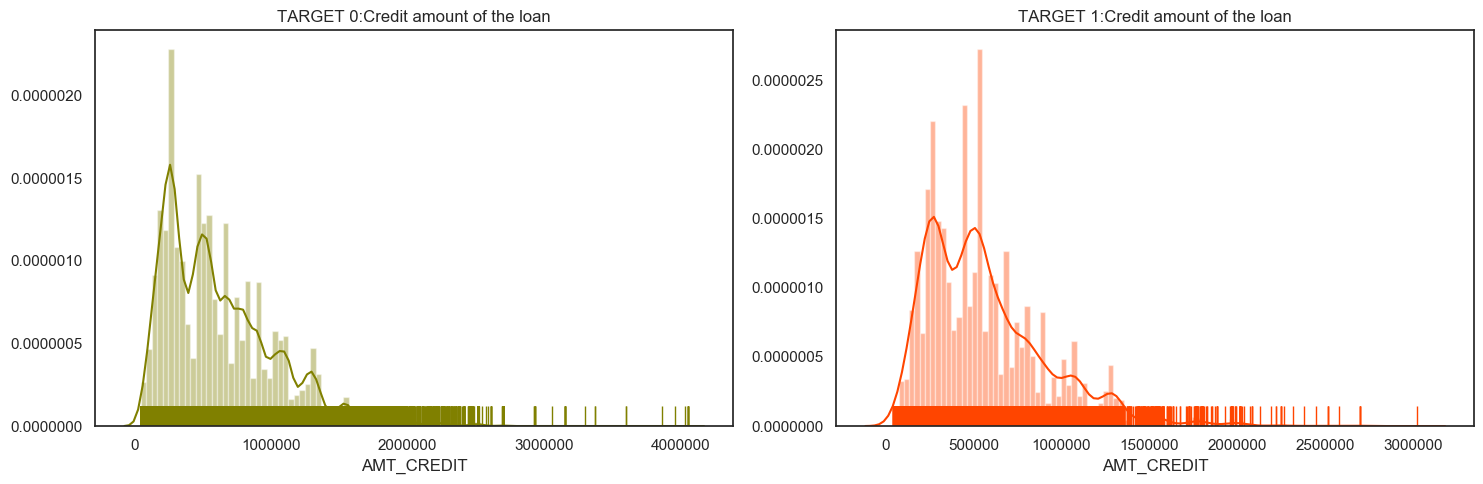

In [54]:
# Plotting Credit Amount Vs Target:
dist_plot('AMT_CREDIT','Credit amount of the loan')

#### Insight: As per above graphs the amount of loan credited is more in the range of 0-1000000

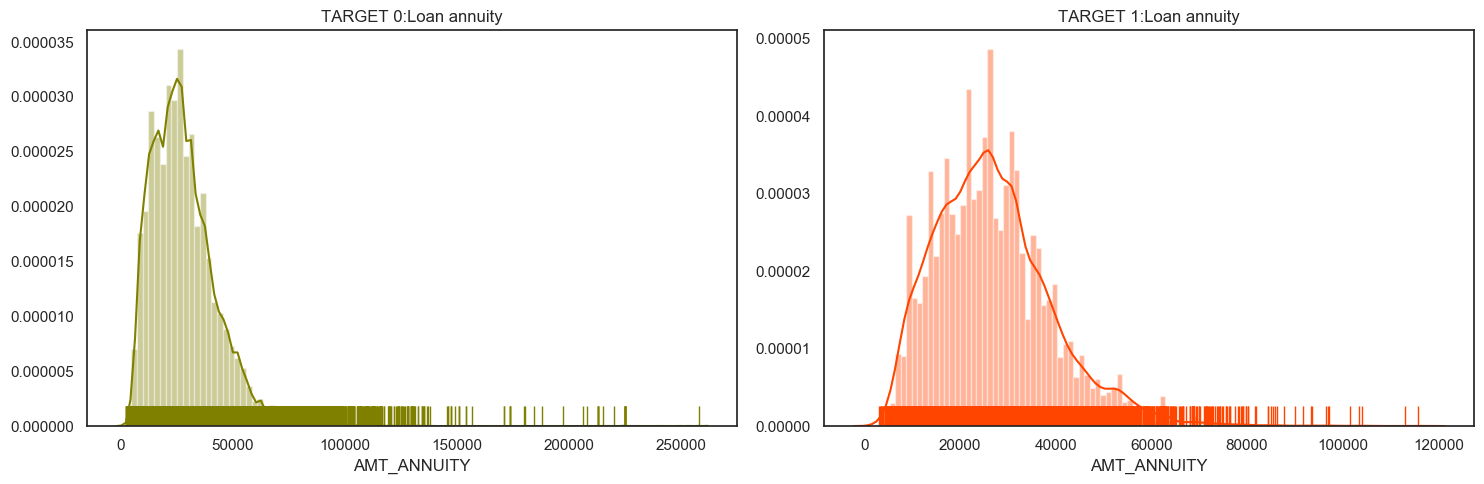

In [55]:
# Plotting Annuity Amount Vs Target:
dist_plot('AMT_ANNUITY','Loan annuity')

#### Insight: As per above graphs the Annuity amount is more in the range of 0-50000

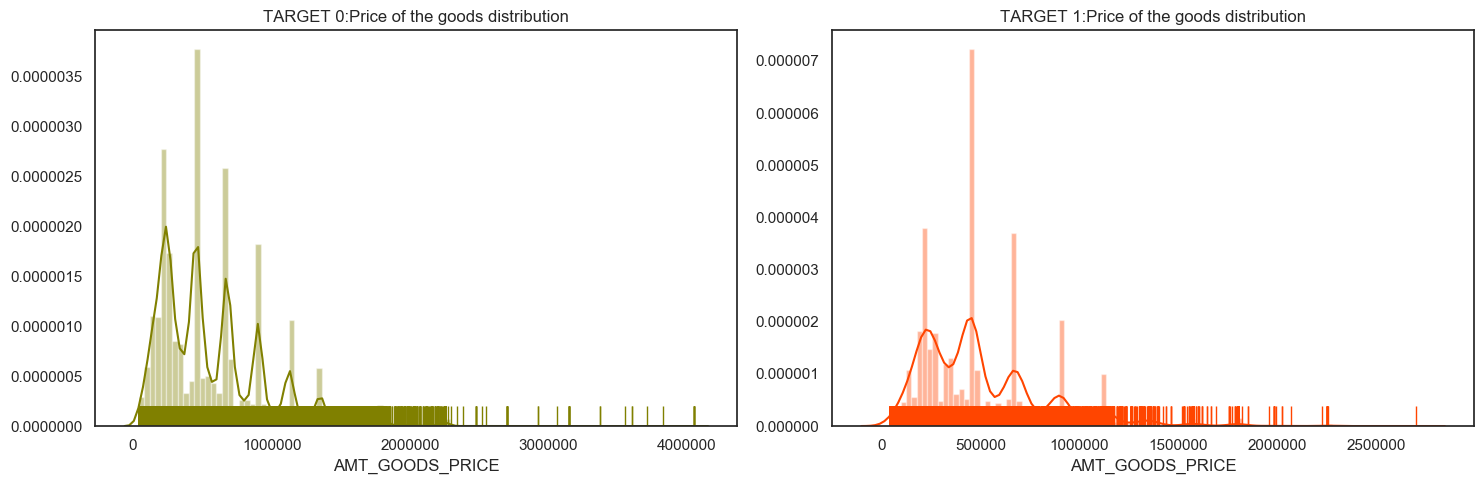

In [56]:
# Plotting Goods Amount Vs Target:
dist_plot('AMT_GOODS_PRICE','Price of the goods distribution')

#### Insight: As per above graphs the amount of Goods is more in the range of 0-1000000

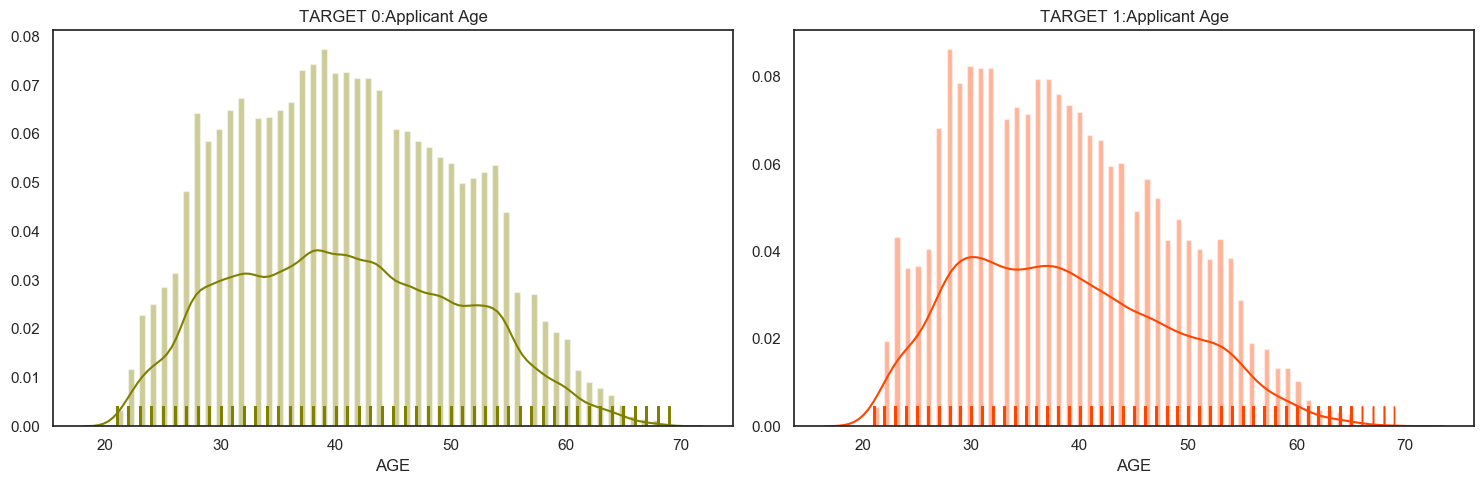

In [57]:
# Plotting Age Vs Target:
dist_plot('AGE','Applicant Age')

#### Insight: As per above graphs the Age is more in the range of 25-55

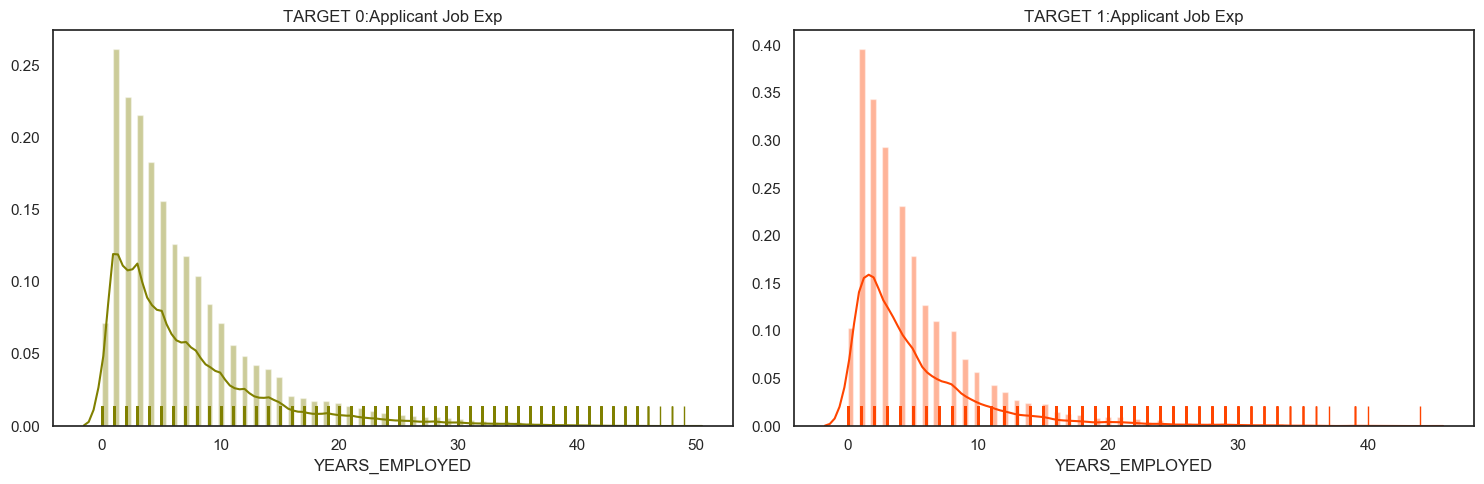

In [58]:
# Plotting Employment Years Vs Target:
dist_plot('YEARS_EMPLOYED','Applicant Job Exp')

#### Insight: As per above graphs people having employment years ranging from 0-10 are more.

## Bivariate Analysis on Categorical variables for application data: Target 0 and 1

In [59]:
# Creating common function to plot graphs
def bar_plot(col,hue,title):
    plt.figure(figsize=(10,6), dpi=60)
    sns.barplot(x=col, y='TARGET',data=df_app_data, hue=hue)
    plt.title(title)
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()
    

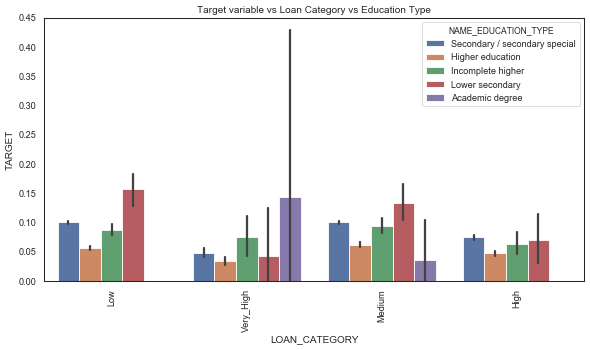

In [60]:
# Plotting Target Vs Loan Category Vs Education Type:
bar_plot('LOAN_CATEGORY','NAME_EDUCATION_TYPE','Target variable vs Loan Category vs Education Type')


#### Insight: People having Lower secondary education take more loans and are most likely to default as well.

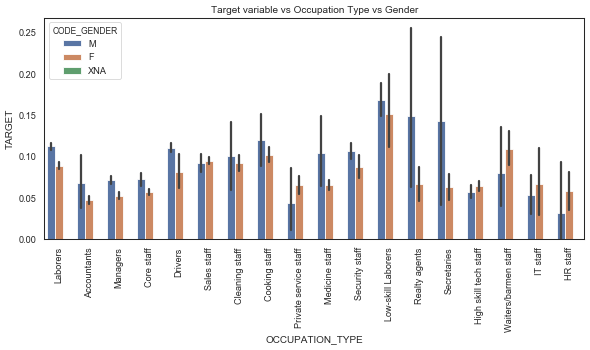

In [61]:
# Plotting Target Vs Occupation Type Vs Gender:
bar_plot('OCCUPATION_TYPE','CODE_GENDER','Target variable vs Occupation Type vs Gender')

#### Insight: Male Low skilled Laborers are most likely to default.

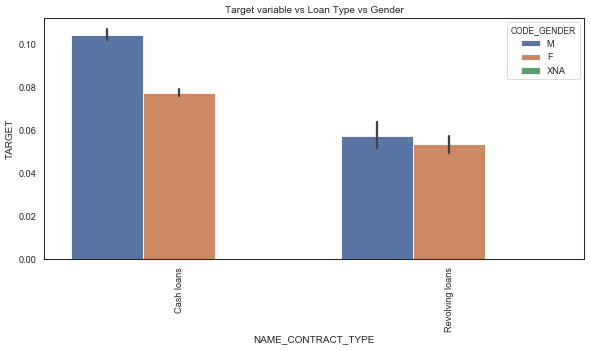

In [62]:
# Plotting Target Vs Loan Type Vs Gender:
bar_plot('NAME_CONTRACT_TYPE','CODE_GENDER','Target variable vs Loan Type vs Gender')

#### Insight: Males tend to default the loan more in case of Cash loans and Revolving loans as well.

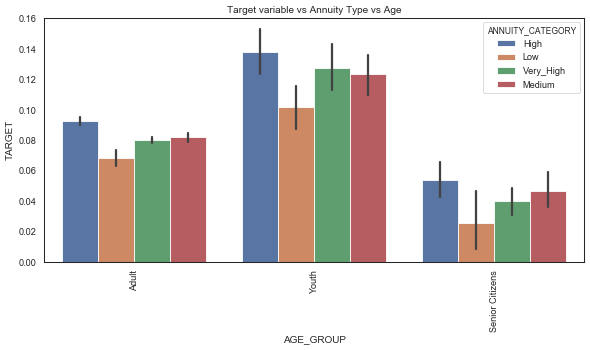

In [63]:
# Plotting Target Vs Annuity Amount Vs Age:
bar_plot('AGE_GROUP','ANNUITY_CATEGORY','Target variable vs Annuity Type vs Age')

#### Insight: Youth population with High Annuity amount (20000-30000) tends to default the loan more.

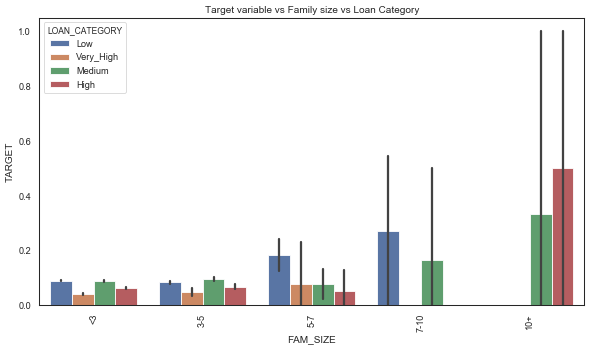

In [64]:
# Plotting Target Vs Family Size Vs Loan Amount:
bar_plot('FAM_SIZE','LOAN_CATEGORY','Target variable vs Family size vs Loan Category')

#### Insight: People having 10+ family members and having High and Medium Loan amount tends to default the loan more.

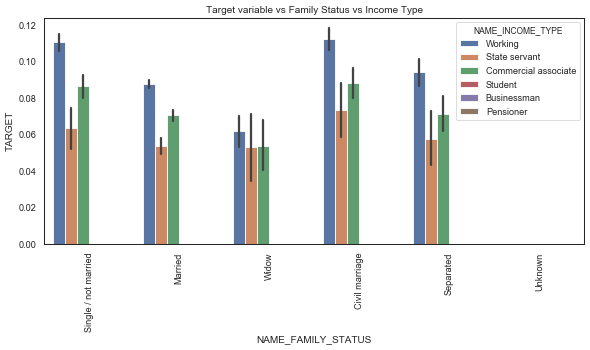

In [65]:
# Plotting Target Vs Marital Status Vs Income Type:
bar_plot('NAME_FAMILY_STATUS','NAME_INCOME_TYPE','Target variable vs Family Status vs Income Type')

#### Insight: Single/Civil marriage people who are Working tends to default more.

## Bivariate Analysis on Numerical  variables for application data: Target 0 and 1

In [66]:
# Creating common function to plot graphs
def bar_plot(col_x,col_y,title,log_scale):
    plt.figure(figsize=(10,8))
    sns.boxplot(y=df_app_data[col_y],x=df_app_data[col_x],hue=df_app_data['TARGET'])
    plt.title(title)
    if(log_scale==True):
        plt.xscale('log')
    plt.show()

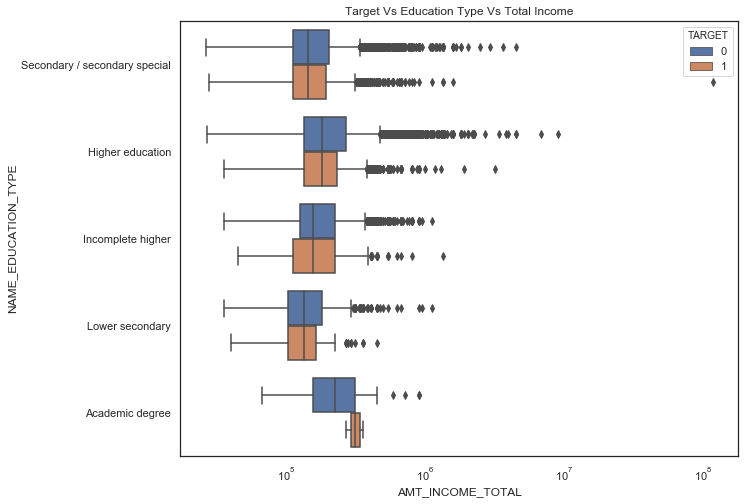

In [67]:
# Plotting Target Vs Education Type Vs Total Income:
bar_plot('AMT_INCOME_TOTAL','NAME_EDUCATION_TYPE','Target Vs Education Type Vs Total Income',True);

#### Insight: People having Academic degree are most likely to repay the loan.

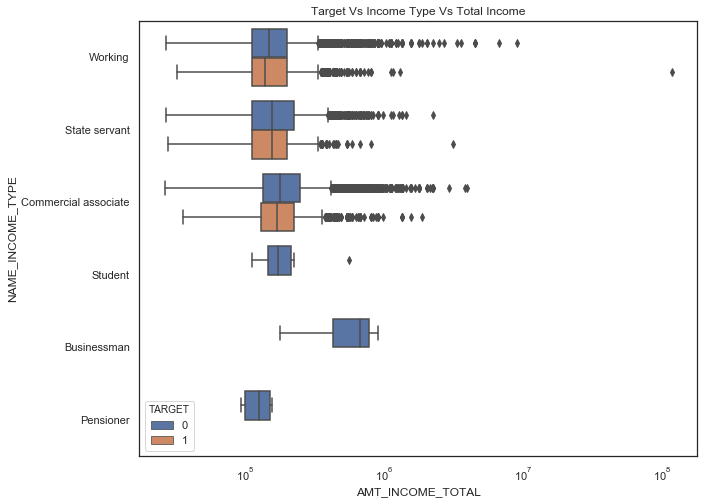

In [68]:
# Plotting Target Vs Income Type Vs Total Income:
bar_plot('AMT_INCOME_TOTAL','NAME_INCOME_TYPE','Target Vs Income Type Vs Total Income',True);

#### Insight: Businessman having higher total income are more likely to repay the loan.

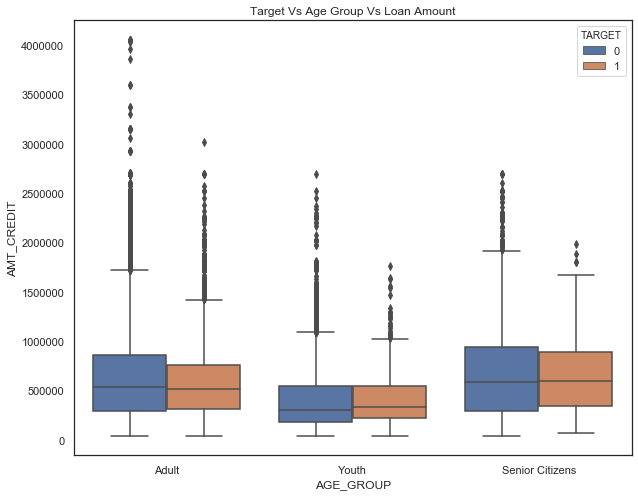

In [69]:
# Plotting Target Vs Age Group Vs Loan Amount:
bar_plot('AGE_GROUP','AMT_CREDIT','Target Vs Age Group Vs Loan Amount',False);

#### Insight: Adult and Youth population tends to default the loan more. 

## Importing Previous Application Data File

In [70]:
# reading csv file
df_prev_app_data=pd.read_csv('previous_application.csv')

In [71]:
# fetching top 5 records from dataset.
df_prev_app_data.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,Y,1,0.0,0.182832,0.867336,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,Y,1,NaN,NaN,NaN,XNA,Approved,-512,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,Y,1,NaN,NaN,NaN,Repairs,Refused,-781,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [72]:
# checking Statistics for numerical column in dataset
df_prev_app_data.describe()

,SK_ID_PREV,SK_ID_CURR,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,HOUR_APPR_PROCESS_START,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,DAYS_DECISION,SELLERPLACE_AREA,CNT_PAYMENT,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
count,1.670214e+06,1.670214e+06,1.297979e+06,1.670214e+06,1.670213e+06,7.743700e+05,1.284699e+06,1.670214e+06,1.670214e+06,774370.000000,5951.000000,5951.000000,1.670214e+06,1.670214e+06,1.297984e+06,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000
mean,1.923089e+06,2.783572e+05,1.595512e+04,1.752339e+05,1.961140e+05,6.697402e+03,2.278473e+05,1.248418e+01,9.964675e-01,0.079637,0.188357,0.773503,-8.806797e+02,3.139511e+02,1.605408e+01,342209.855039,13826.269337,33767.774054,76582.403064,81992.343838,0.332570
std,5.325980e+05,1.028148e+05,1.478214e+04,2.927798e+05,3.185746e+05,2.092150e+04,3.153966e+05,3.334028e+00,5.932963e-02,0.107823,0.087671,0.100879,7.790997e+02,7.127443e+03,1.456729e+01,88916.115834,72444.869708,106857.034789,149647.415123,153303.516729,0.471134
min,1.000001e+06,1.000010e+05,0.000000e+00,0.000000e+00,0.000000e+00,-9.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,-0.000015,0.034781,0.373150,-2.922000e+03,-1.000000e+00,0.000000e+00,-2922.000000,-2892.000000,-2801.000000,-2889.000000,-2874.000000,0.000000
25%,1.461857e+06,1.893290e+05,6.321780e+03,1.872000e+04,2.416050e+04,0.000000e+00,5.084100e+04,1.000000e+01,1.000000e+00,0.000000,0.160716,0.715645,-1.300000e+03,-1.000000e+00,6.000000e+00,365243.000000,-1628.000000,-1242.000000,-1314.000000,-1270.000000,0.000000
50%,1.923110e+06,2.787145e+05,1.125000e+04,7.104600e+04,8.054100e+04,1.638000e+03,1.123200e+05,1.200000e+01,1.000000e+00,0.051605,0.189122,0.835095,-5.810000e+02,3.000000e+00,1.200000e+01,365243.000000,-831.000000,-361.000000,-537.000000,-499.000000,0.000000
75%,2.384280e+06,3.675140e+05,2.065842e+04,1.803600e+05,2.164185e+05,7.740000e+03,2.340000e+05,1.500000e+01,1.000000e+00,0.108909,0.193330,0.852537,-2.800000e+02,8.200000e+01,2.400000e+01,365243.000000,-411.000000,129.000000,-74.000000,-44.000000,1.000000
max,2.845382e+06,4.562550e+05,4.180581e+05,6.905160e+06,6.905160e+06,3.060045e+06,6.905160e+06,2.300000e+01,1.000000e+00,1.000000,1.000000,1.000000,-1.000000e+00,4.000000e+06,8.400000e+01,365243.000000,365243.000000,365243.000000,365243.000000,365243.000000,1.000000


In [73]:
# checking dataset column info 
df_prev_app_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

In [74]:
# checking row and column count for dataset
df_prev_app_data.shape

(1670214, 37)

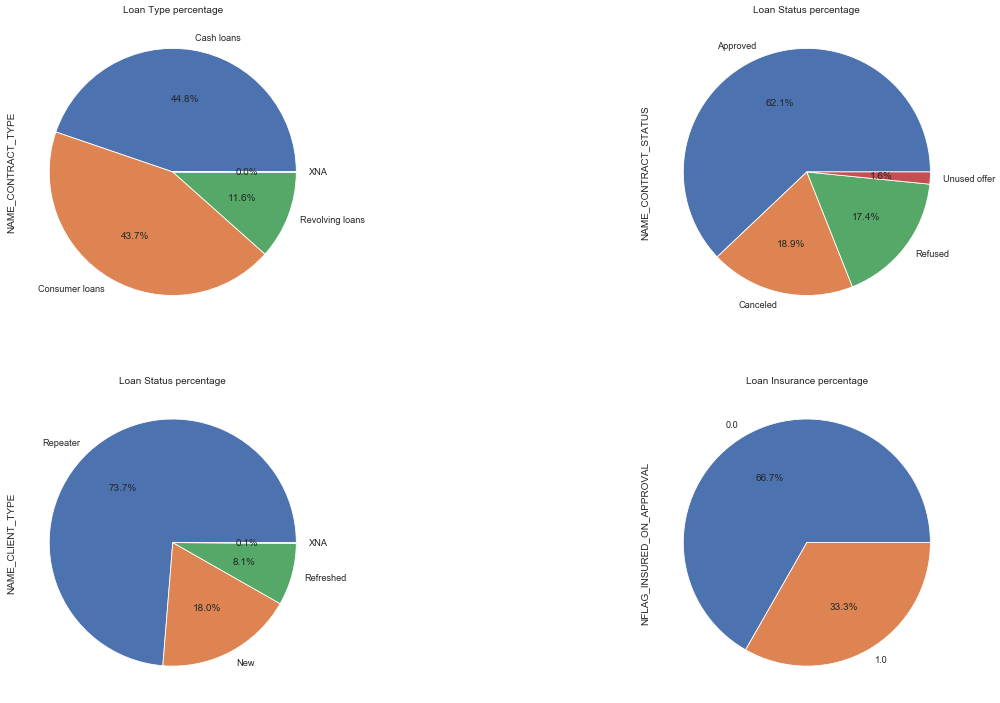

In [75]:
# Plotting pie charts to see percentage values for few categorical columns.
plt.figure(figsize=(25,15), dpi=60)
plt.subplot(2,2,1)
df_prev_app_data.NAME_CONTRACT_TYPE.value_counts().plot.pie(autopct='%1.1f%%');
plt.title("Loan Type percentage")
plt.subplot(2,2,2)
df_prev_app_data.NAME_CONTRACT_STATUS.value_counts().plot.pie(autopct='%1.1f%%');
plt.title("Loan Status percentage")
plt.subplot(2,2,3)
df_prev_app_data.NAME_CLIENT_TYPE.value_counts().plot.pie(autopct='%1.1f%%');
plt.title("Loan Status percentage")
plt.subplot(2,2,4)
df_prev_app_data.NFLAG_INSURED_ON_APPROVAL.value_counts().plot.pie(autopct='%1.1f%%');
plt.title("Loan Insurance percentage")
plt.show()

In [76]:
# Merging application data and previous application data
df_merge_app_data=pd.merge(df_app_data,df_prev_app_data,how='left',on=['SK_ID_CURR', 'SK_ID_CURR'])

In [77]:
# checking row and column count on merged dataset
df_merge_app_data.shape

(801365, 117)

In [78]:
# Fetching top 5 records from merged dataset
df_merge_app_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE_x,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,AMT_GOODS_PRICE_x,NAME_TYPE_SUITE_x,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START_x,HOUR_APPR_PROCESS_START_x,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,INCOME_CATEGORY,FAM_SIZE,AGE,AGE_GROUP,LOAN_CATEGORY,ANNUITY_CATEGORY,YEARS_EMPLOYED,ORGANIZATION_CAT,SK_ID_PREV,NAME_CONTRACT_TYPE_y,AMT_ANNUITY_y,AMT_APPLICATION,AMT_CREDIT_y,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE_y,WEEKDAY_APPR_PROCESS_START_y,HOUR_APPR_PROCESS_START_y,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE_y,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,9461,637,-3648.0,-2120,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,0.139376,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,Upper Middle Class,<3,26,Adult,Low,High,2,Business,1038818.0,Consumer loans,9251.775,179055.0,179055.0,0.0,179055.0,SATURDAY,9.0,Y,1.0,0.000000,NaN,NaN,XAP,Approved,-606.0,XNA,XAP,NaN,New,Vehicles,POS,XNA,Stone,500.0,Auto technology,24.0,low_normal,POS other with interest,365243.0,-565.0,125.0,-25.0,-17.0,0.0
1,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,19046,225,-4260.0,-2531,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.555912,0.729567,0.0,0.0,0.0,0.0,-815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,Lower Class,<3,52,Adult,Low,Low,1,Government,1564014.0,Consumer loans,5357.250,24282.0,20106.0,4860.0,24282.0,FRIDAY,5.0,Y,1.0,0.212008,NaN,NaN,XAP,Approved,-815.0,Cash through the bank,XAP,Unaccompanied,New,Mobile,POS,XNA,Regional / Local,30.0,Connectivity,4.0,middle,POS mobile without interest,365243.0,-784.0,-694.0,-724.0,-714.0,0.0
2,100008,0,Cash loans,M,N,Y,0,99000.0,490495.5,27517.5,454500.0,"Spouse, partner",State servant,Secondary / secondary special,Married,House / apartment,0.035792,16941,1588,-4970.0,-477,1,1,1,1,1,0,Laborers,2.0,2,2,WEDNESDAY,16,0,0,0,0,0,0,Other,0.354225,0.621226,0.0,0.0,0.0,0.0,-2536.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,1.0,1.0,Lower Class,<3,46,Adult,Low,High,4,Other,2218188.0,Consumer loans,17885.835,162598.5,162598.5,0.0,162598.5,THURSDAY,10.0,Y,1.0,

In [79]:
# checking columns and datatypes for merged dataset
df_merge_app_data.dtypes

SK_ID_CURR                         int64
TARGET                             int64
NAME_CONTRACT_TYPE_x              object
CODE_GENDER                       object
FLAG_OWN_CAR                      object
FLAG_OWN_REALTY                   object
CNT_CHILDREN                       int64
AMT_INCOME_TOTAL                 float64
AMT_CREDIT_x                     float64
AMT_ANNUITY_x                    float64
AMT_GOODS_PRICE_x                float64
NAME_TYPE_SUITE_x                 object
NAME_INCOME_TYPE                  object
NAME_EDUCATION_TYPE               object
NAME_FAMILY_STATUS                object
NAME_HOUSING_TYPE                 object
REGION_POPULATION_RELATIVE       float64
DAYS_BIRTH                         int64
DAYS_EMPLOYED                      int64
DAYS_REGISTRATION                float64
DAYS_ID_PUBLISH                    int64
FLAG_MOBIL                         int64
FLAG_EMP_PHONE                     int64
FLAG_WORK_PHONE                    int64
FLAG_CONT_MOBILE

In [80]:
# renaming columns that end with _x & _y
df_merge_app_data.columns = [col.replace('_x', '_CURR') for col in df_merge_app_data.columns]
df_merge_app_data.columns = [col.replace('_y', '_PREV') for col in df_merge_app_data.columns]

In [81]:
# checking columns again once rename is done
df_merge_app_data.dtypes

SK_ID_CURR                            int64
TARGET                                int64
NAME_CONTRACT_TYPE_CURR              object
CODE_GENDER                          object
FLAG_OWN_CAR                         object
FLAG_OWN_REALTY                      object
CNT_CHILDREN                          int64
AMT_INCOME_TOTAL                    float64
AMT_CREDIT_CURR                     float64
AMT_ANNUITY_CURR                    float64
AMT_GOODS_PRICE_CURR                float64
NAME_TYPE_SUITE_CURR                 object
NAME_INCOME_TYPE                     object
NAME_EDUCATION_TYPE                  object
NAME_FAMILY_STATUS                   object
NAME_HOUSING_TYPE                    object
REGION_POPULATION_RELATIVE          float64
DAYS_BIRTH                            int64
DAYS_EMPLOYED                         int64
DAYS_REGISTRATION                   float64
DAYS_ID_PUBLISH                       int64
FLAG_MOBIL                            int64
FLAG_EMP_PHONE                  

## Univariante Analysis on Merged Dataset

In [82]:
# Creating common function to plot STACKED barplot on merged dataset
def merge_plot(col,title):
    sns.set(style="white")
    #plt.figure(figsize=(10,10))
    #sns.countplot(x=df_merge_app_data[col],hue='NAME_CONTRACT_STATUS',data=df_merge_app_data,palette="rocket")
    pd.crosstab(df_merge_app_data[col],
            df_merge_app_data["NAME_CONTRACT_STATUS"]).plot.bar(stacked=True,figsize=(10,10),color='GcRB')
    plt.title('TARGET 0:'+title)
    plt.xticks(rotation=90)
    plt.tight_layout()

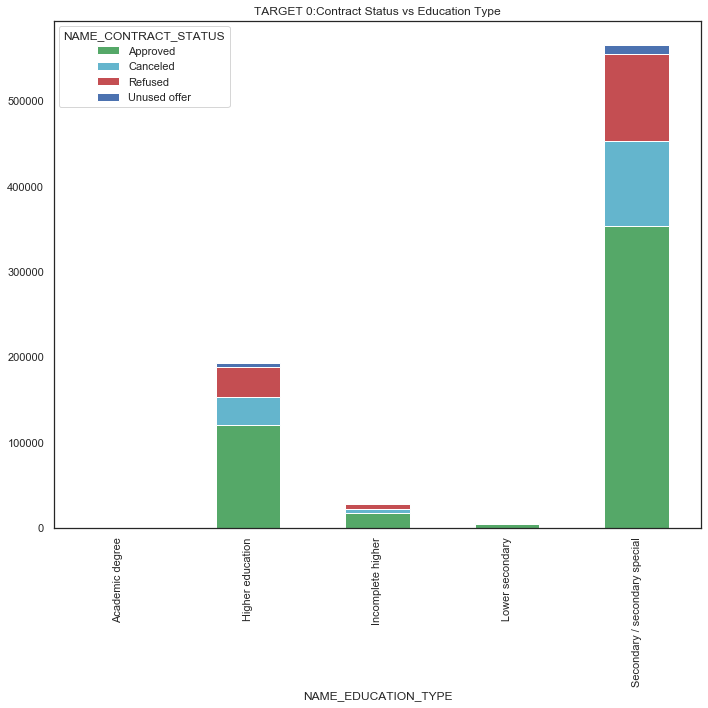

In [83]:
# Plotting Application Status Vs Education Type:
merge_plot('NAME_EDUCATION_TYPE','Contract Status vs Education Type')

#### Insight: Aplicants having Secondary/secondary special education get their loan application approved more than others.

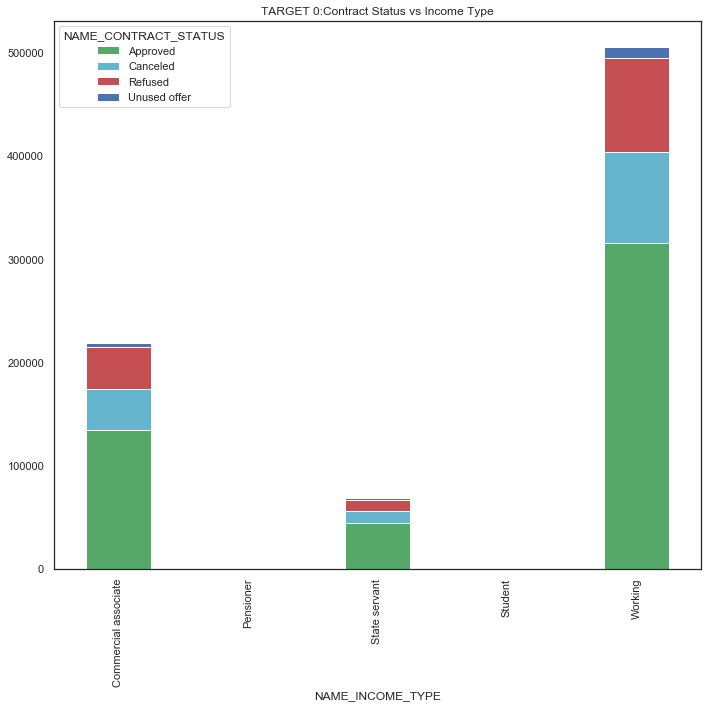

In [84]:
# Plotting Application Status Vs Income Type
merge_plot('NAME_INCOME_TYPE','Contract Status vs Income Type')

#### Insight: Applicants with Working Income Type gets their loan application approved more than others.

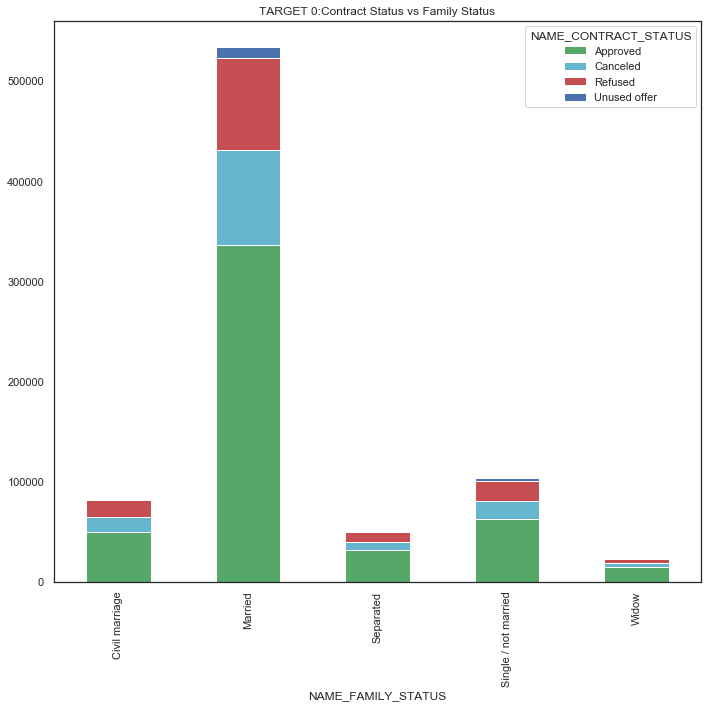

In [85]:
# Plotting Application Status Vs Family Status:
merge_plot('NAME_FAMILY_STATUS','Contract Status vs Family Status')

#### Insight: Applicants with Married family status gets their loan application approved more than others.

## Bivariante Analysis on Merged Dataset

In [86]:
# Creating common function to plot barplot on merged dataset
def merge_Bar_plot(col,hue,title):
    plt.figure(figsize=(15,8), dpi=60)
    sns.barplot(x='NAME_CONTRACT_STATUS', y=col,data=df_merge_app_data, hue=hue)
    plt.title(title)
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()
    

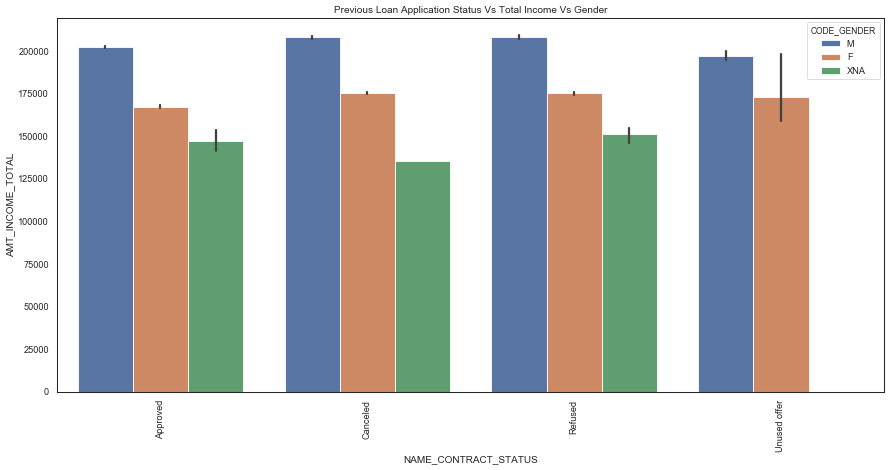

In [87]:
# Plotting Previous Loan Application Status Vs Total Income Vs Gender
merge_Bar_plot('AMT_INCOME_TOTAL','CODE_GENDER','Previous Loan Application Status Vs Total Income Vs Gender')

#### Insight:  Male population across all application status values tends to have almost same Total Income i.e. 200000

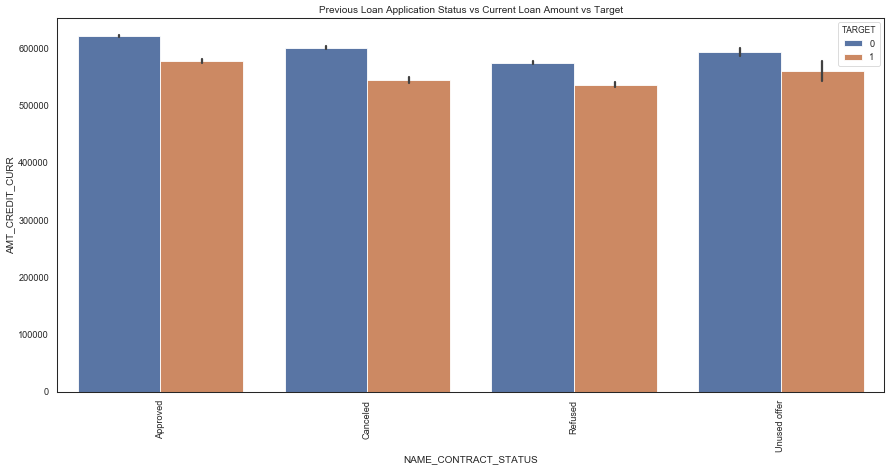

In [88]:
# Plotting Previous Loan Application Status vs Current Loan Amount vs Target:
merge_Bar_plot('AMT_CREDIT_CURR','TARGET','Previous Loan Application Status vs Current Loan Amount vs Target')

#### Insight: People with loan amount close to 600000 are most likely to Default the loan and repay the loan as well.

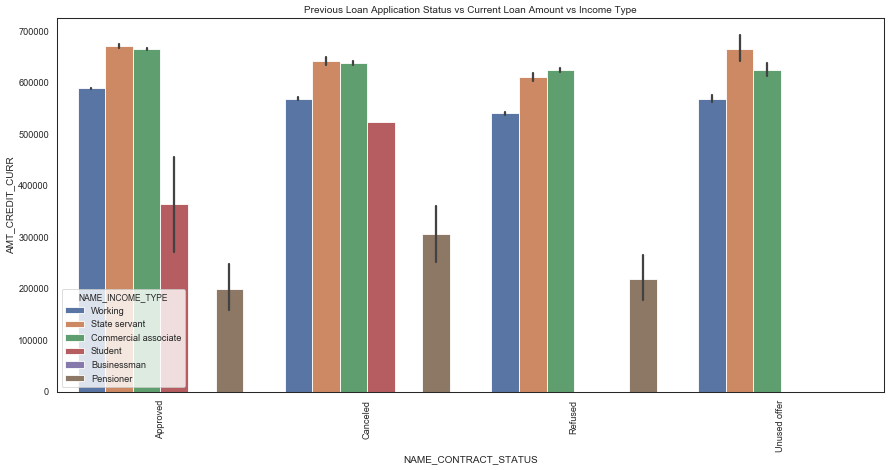

In [89]:
# Plotting Previous Loan Application Status vs Current Loan Amount vs Income Type:
merge_Bar_plot('AMT_CREDIT_CURR','NAME_INCOME_TYPE','Previous Loan Application Status vs Current Loan Amount vs Income Type')

#### Insight: State servant and Commercial associate with almost same loan application amount (i.e. 6700000) are getting their loan Approved more.

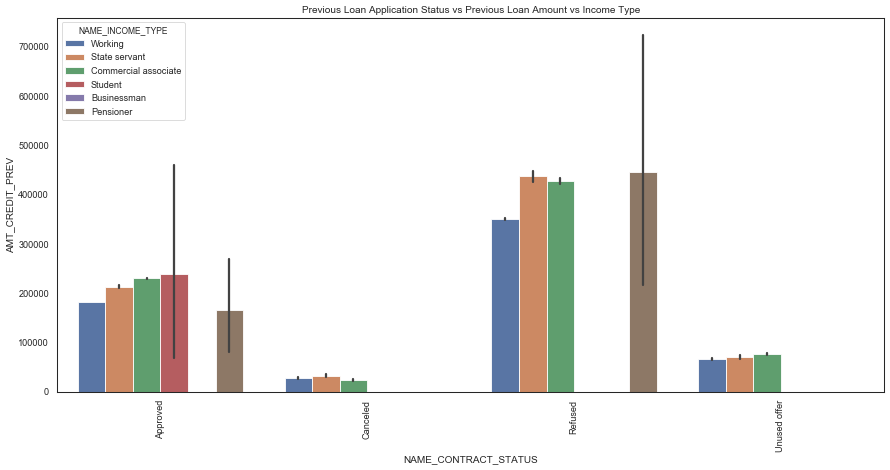

In [90]:
# Plotting Previous Loan Application Status vs Previous Loan Amount vs Income Type:
merge_Bar_plot('AMT_CREDIT_PREV','NAME_INCOME_TYPE','Previous Loan Application Status vs Previous Loan Amount vs Income Type')

#### Insight: Loan applications for amount between 0-2400000 generally gets Approved across all income types

# Conclusion:

## From all our analysis, visualisation and insights provided so far, below are variables that contributes most towards loan application default:

### GENDER
###  EDUCATION TYPE
###  OCCUPATION TYPE
### INCOME TYPE
### CONTRACT TYPE
### AGE
### FAMILY STATUS
### FAMILY SIZE
